## Section 1: Load data

In [3]:
import numpy as np                                      # for dealing with data
from scipy.signal import butter, sosfiltfilt, sosfreqz  # for filtering
import matplotlib.pyplot as plt                         # for plotting
from scipy import interp
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [19]:
# Load in train signals and markers + labels
X_train = np.load('train_data.npy')
labels_train = np.genfromtxt('train_label.csv', delimiter=',').astype(int) # also contains labels in first column
y = labels_train[:, 0] # let's only save the labels
print('First 100 values from y: ' + str(y[0:100]))

# Let's also load in our test signals and markers
X_test = np.load('test_data.npy')
labels_test = np.genfromtxt('test_label.csv', delimiter=',').astype(int)

# Let's print out the shapes of our data
print('X_train shape: ' + str(X_train.shape))
print('y shape: ' + str(y.shape))
print('X_test shape: ' + str(X_test.shape))
print('labels_test shape: ' + str(labels_test.shape))

First 100 values from y: [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
X_train shape: (5, 64, 7561)
y shape: (7561,)
X_test shape: (5, 64, 5580)
labels_test shape: (5580,)


In [20]:
X_train = X_train.reshape(-1, X_train.shape[-1]).T  % -1 means automatically modify this dimension according to other dimensions
X_test = X_test.reshape(-1, X_test.shape[-1]).T

# Let's print out the new shape
print('X_train shape is now: ' + str(X_train.shape))
print('X_test  shape is now: ' + str(X_test.shape))

X_train shape is now: (7561, 320)
X_test  shape is now: (5580, 320)


In [23]:
# Train classifier 
clf_lsqrs = LinearDiscriminantAnalysis(solver = 'lsqr',  shrinkage = 'auto').fit(X_train, y)
print("Train finished!")

Train finished!


In [25]:
# 5-fold cross validation
score_lsqrs = cross_val_score(clf_lsqrs, X_train, y, cv = 5)

# mean score
print("solver = lsqr  accuracy: " + str(np.mean(score_lsqrs)))

solver = lsqr  accuracy: 0.870120157925842


In [32]:
# prediction

conf = clf_lsqrs.decision_function(X_test) # predicted confidence score
pred = clf_lsqrs.predict(X_test)           # predicted label (we won't actually use this)
print("Conf:"+ str(conf[0:100]))
print("Pred:"+ str(pred[0:100]))

Conf:[ 1.33034542 -6.11015533 -3.00688623 -3.19595164 -1.42835548 -2.63596263
 -4.80883761 -0.66604144 -3.3568687  -0.91395857  0.83532779 -2.84563106
  0.47841878 -0.81692984 -2.63319876 -4.70195754  4.3729467  -1.874376
 -7.51207093 -0.86455983 -5.405519   -2.1585846  -5.56328606 -1.91640675
 -4.40301118 -1.51650003 -4.38925244 -3.12654378 -0.91858943 -7.67209495
 -7.20371833  3.59808813 -3.90927252  1.59983429 -0.65188814 -2.94586714
 -0.58752122 -5.10229566  2.19755773 -3.20705927 -2.35504868 -0.4513598
 -1.87813549  2.35162369 -6.74016623 -0.59894468 -3.10191383 -0.89964969
  0.42623301 -7.72250199 -1.29696358 -1.74173507 -3.01460788 -0.61236523
 -0.69791265 -5.79353588 -4.51692869 -4.67235345 -4.0722534   0.48484381
 -4.93050763  1.5003     -4.945849   -3.17893496 -2.9761557   3.78586188
 -5.639891   -1.76505969 -0.38783528 -2.74053896 -1.47254758 -6.83607845
 -3.59843936  2.24535198 -6.62352686 -2.94963645 -4.4090993  -2.78530958
 -6.35850573 -6.59175505  1.92360091 -7.02122382 

## Section 2: Verify classifier via ROC and AUG

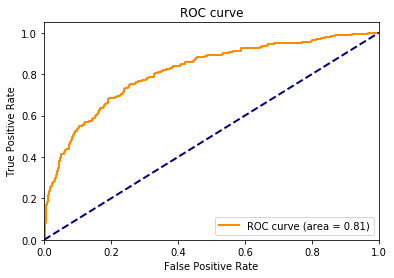

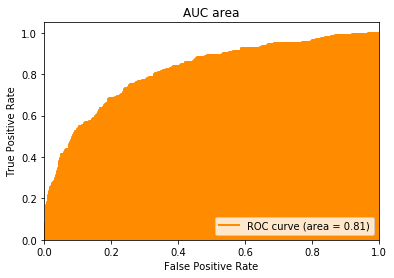

In [102]:
nfolds = 5;
cv = StratifiedKFold(n_splits = nfolds)
X = X_train

probas = clf_lsqrs.predict_proba(X[test])
fpr, tpr, th_lsqrs = roc_curve(y[test], probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr,
                 tpr,
                 facecolor='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC area')
plt.legend(loc="lower right")
plt.show()

## Section 3: Test

In [27]:
# Here are the translations for the labels:
# Columns 0-5 -> Labels 1-6
# Rows 0-5 -> Labels 7-12
# Let's create this matrix
#                         1    2    3    4    5    6
char_matrix = np.array([['A', 'B', 'C', 'D', 'E', 'F'], # 7
                        ['G', 'H', 'I', 'J', 'K', 'L'], # 8
                        ['M', 'N', 'O', 'P', 'Q', 'R'], # 9
                        ['S', 'T', 'U', 'V', 'W', 'X'], # 10
                        ['Y', 'Z', '1', '2', '3', '4'], # 11
                        ['5', '6', '7', '8', '9', '0']])# 12

In [33]:
# Define some useful variables
char_breaks = 15 * 12 # number of stimuli per character
ch = 1;                # which character we want

# Grab our first character's marker, prediction, and confidence
char1_mrks = labels_test[char_breaks*(ch-1):char_breaks*ch]
char1_pred = pred[char_breaks*(ch-1):char_breaks*ch]
char1_conf = conf[char_breaks*(ch-1):char_breaks*ch]

# Let's merge these
char1 = np.array([char1_mrks, char1_pred, char1_conf]).T

In [47]:
print(char1.shape)
char1_sort = char1[char1[:,2].argsort()]
# reverse char1_sort
char1_sort = char1_sort[::-1]
print("Before sort:\n"+ str(char1[0:5]))
print("After sort:\n"+ str(char1_sort[0:5]))

(180, 3)
Before sort:
[[ 6.          1.          1.33034542]
 [12.          0.         -6.11015533]
 [ 8.          0.         -3.00688623]
 [ 3.          0.         -3.19595164]
 [ 4.          0.         -1.42835548]]
After sort:
[[7.         1.         6.29673973]
 [6.         1.         4.3729467 ]
 [7.         1.         3.78586188]
 [7.         1.         3.59808813]
 [6.         1.         3.17727556]]


In [77]:
x = np.zeros([12,1])
for i in range(0, 12):
    _filter = char1_sort[:, 0] == i + 1
    if i ==0:
        print(_filter)
    rowcol = char1_sort[_filter]
    if i ==0:
        print(rowcol)
        
    rowcol_mean = np.mean(rowcol, 0)[2]
    if i == 0:
        print(rowcol_mean)
    x[i] = rowcol_mean
    
    
# Now let's print our character
row = np.argmax(x[6:])
col = np.argmax(x[0:6])
our_char = char_matrix[row, col]
print('Our character is: ' + our_char)

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False  True False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False  True False  True False False False False
 False False  True False False False False  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False False  True False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True Fa

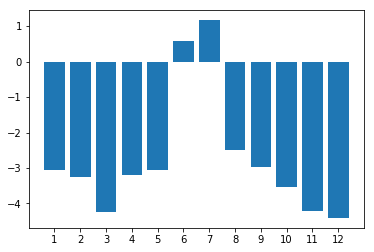

In [78]:
plt.figure()
ticks = np.array(range(1, x.shape[0] + 1, 1))
plt.bar(ticks, np.ravel(x), tick_label = ticks)
plt.show()

In [80]:
output_string = ''
for c in range(1, int((X_test.shape[0]) / char_breaks) + 1):
    # Lets break up test into char 'c'
    temp_mrks = markers_test[char_breaks * (c - 1):char_breaks * c]
    temp_pred = pred[char_breaks * (c - 1):char_breaks * c]
    temp_conf = conf[char_breaks * (c - 1):char_breaks * c]

    # Let's merge these and sort by highest confidence
    temp_char = np.array([temp_mrks, temp_pred, temp_conf]).T
    temp_char = temp_char[temp_char[:, 2].argsort()[::-1]]
    
    # Create our averages
    x = np.zeros(shape = (12, 1))
    for i in range(0, x.shape[0]):
        x[i, 0] = np.mean(temp_char[temp_char[:, 0] == i + 1, 2])
        
    # Now let's print our character
    row = np.argmax(x[6:,  0])
    col = np.argmax(x[0:6, 0])
    our_char = char_matrix[row, col]
    output_string += our_char + ' '
    
# Print our result
print(output_string)

F O O D M O O T H A M P I E C A K E T U N A Z Y G O T 4 5 6 7 


#### ANS: F O O D M O O T H A M P I E C A K E T U N A Z Y G O T 4 5 6 7
http://www.bbci.de/competition/ii/results/tax_iib_desc.pdf